In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tubagusnasrulah","key":"8facc21e9a1144cf3682611cbaaa2622"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d jillanisofttech/lung-cancer-detection

Dataset URL: https://www.kaggle.com/datasets/jillanisofttech/lung-cancer-detection
License(s): CC0-1.0
  0% 0.00/2.00k [00:00<?, ?B/s]
100% 2.00k/2.00k [00:00<00:00, 2.50MB/s]


In [4]:
!mkdir lung-cancer-detection
!unzip lung-cancer-detection.zip -d lung-cancer-detection
!ls lung-cancer-detection

Archive:  lung-cancer-detection.zip
  inflating: lung-cancer-detection/survey lung cancer.csv  
'survey lung cancer.csv'


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, confusion_matrix

import tensorflow as tf
from keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

In [6]:
df = pd.read_csv("/content/lung-cancer-detection/survey lung cancer.csv")

In [7]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [9]:
df.shape

(309, 16)

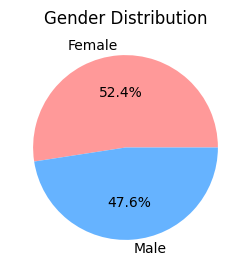

In [10]:
# Menghitung frekuensi
gender_counts = df['GENDER'].value_counts()

# Membuat diagram pie
plt.figure(figsize=(3,3))
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.show()

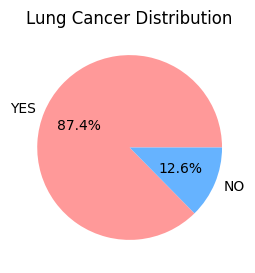

In [11]:
# Menghitung frekuensi
cancer_counts = df['LUNG_CANCER'].value_counts()

# Membuat diagram pie
plt.figure(figsize=(3,3))
plt.pie(cancer_counts, labels=['YES', 'NO'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Lung Cancer Distribution')
plt.show()

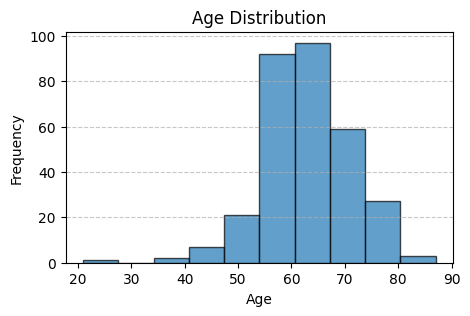

In [12]:
# Membuat Histogram
plt.figure(figsize=(5,3))
plt.hist(df['AGE'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
df = df.replace({1: 0, 2: 1})

In [14]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [15]:
df['GENDER'] = df['GENDER'].replace({'F': 0, 'M': 1})

In [16]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'NO': 0, 'YES': 1})

In [17]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [18]:
X = df.drop(['LUNG_CANCER'], axis=1)  # X berisi fitur tanpa kolom target
y = df["LUNG_CANCER"]  # y berisi target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (247, 15)
Shape of y_train: (247,)
Shape of X_test: (62, 15)
Shape of y_test: (62,)


In [21]:
# Definisikan model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 473 (1.85 KB)
Trainable params: 473 (1.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


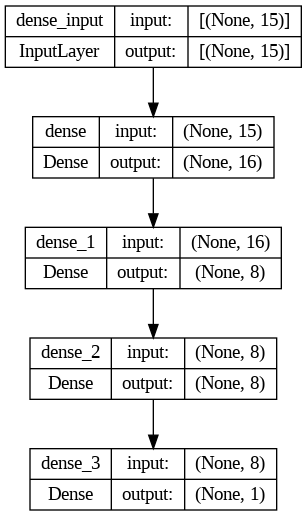

In [22]:
plot_model(model,show_shapes=True, show_layer_names=True)

In [23]:
# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train,
                    y_train,
                    epochs=150,
                    validation_split=0.25)

Epoch 1/150
6/6 [==============================] - 2s 75ms/step - loss: 2.3311 - accuracy: 0.0973 - val_loss: 1.8109 - val_accuracy: 0.1774
Epoch 2/150
6/6 [==============================] - 0s 16ms/step - loss: 1.8022 - accuracy: 0.0973 - val_loss: 1.4008 - val_accuracy: 0.1774
Epoch 3/150
6/6 [==============================] - 0s 15ms/step - loss: 1.3633 - accuracy: 0.0973 - val_loss: 1.0690 - val_accuracy: 0.1774
Epoch 4/150
6/6 [==============================] - 0s 12ms/step - loss: 1.0184 - accuracy: 0.0973 - val_loss: 0.8241 - val_accuracy: 0.1774
Epoch 5/150
6/6 [==============================] - 0s 9ms/step - loss: 0.7681 - accuracy: 0.2378 - val_loss: 0.6609 - val_accuracy: 0.8065
Epoch 6/150
6/6 [==============================] - 0s 11ms/step - loss: 0.5969 - accuracy: 0.8865 - val_loss: 0.5626 - val_accuracy: 0.8226
Epoch 7/150
6/6 [==============================] - 0s 11ms/step - loss: 0.4831 - accuracy: 0.9027 - val_loss: 0.5095 - val_accuracy: 0.8226
Epoch 8/150
6/6 [====

In [25]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

2/2 [==============================] - 0s 7ms/step - loss: 0.4079 - accuracy: 0.8387
Loss: 0.40786513686180115, Accuracy: 0.8387096524238586


In [26]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [27]:
# Asumsikan model dan data sudah ada
predictions = model.predict(X_test)
probabilities = predictions.flatten()

# Uji dengan threshold 0.5
threshold = 0.5
predicted_classes = (probabilities >= threshold).astype(int)

2/2 [==============================] - 0s 6ms/step


In [28]:
print(classification_report(y_test, predicted_classes))
print(confusion_matrix(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.84      1.00      0.91        52

    accuracy                           0.84        62
   macro avg       0.42      0.50      0.46        62
weighted avg       0.70      0.84      0.77        62

[[ 0 10]
 [ 0 52]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


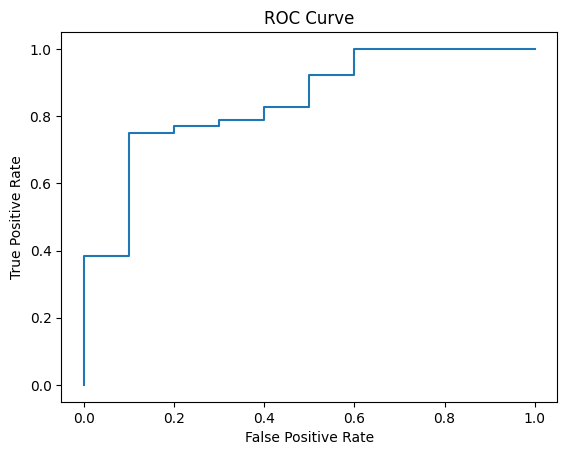

Optimal Threshold: 0.89251417


In [32]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Optimal Threshold
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)

In [30]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [33]:
#kena
prediction = model.predict([[1,69,0,1,1,0,0,1,0,1,1,1,1,1,1]])
print(prediction)

if prediction > 0.8925 :
  print("kena")
else:
  print("tidak kena")

1/1 [==============================] - 0s 63ms/step
[[0.9382061]]
kena


In [34]:
#tidak kena
prediction = model.predict([[0,59,0,0,0,1,0,1,0,1,0,1,1,0,1]])
print(prediction)

if prediction > 0.8925 :
  print("kena")
else:
  print("tidak kena")

1/1 [==============================] - 0s 56ms/step
[[0.89107895]]
tidak kena


In [35]:
from tensorflow.keras.models import load_model

model.save('lung_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
# Load the model from HDF5 format
model = tf.keras.models.load_model('lung_model.h5')

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('lung_model.tflite', 'wb') as f:
    f.write(tflite_model)